# Part II - San Francisco - Bay Area Bike Share
## by Jason Kannemeyer

## Investigation Overview


> My investigation in this project focused on how trip duration varies depending on the day/month and time of trip, as well as the influence of membership type and bike type.
### Key insights
* Rides seems to be higher during the normal morning traffic rush hours, and flattens during the day but picks up again later at night when people return from work.
* Casual drivers seems to last longer then that of members, even though the number of members are more than that of casual drivers
* I also found that the number of bikes does not necesarily mean the durations will be longer, because what I saw from the comparison between the types of bikes - even though Docked bikes only accounts for 10.087% of the total bikes, their trip durations are higher then that of the bikes with higher numbers
* From the data that I used you can see that people tend to use the service more on Saturday and Sunday, and October seems to be the time when more trips are recorded then any other month - could be because of tourists traveling more to the bay area in October.

## Dataset Overview

> Bay Area Bike Share began in August 2013 and features a fleet of 700 bicycles and 70 stations along the San Francisco peninsula. Specially designed, durable bikes are locked into a network of docking stations and can be rented from and returned to any station in the system. The bike share system operates year-round, 24 hours a day, with stations in San Francisco, Redwood City, Palo Alto, Mountain View, and San Jose.

> Bike sharing allows Bay Area residents and visitors an additional, cost-effective transportation option. It offers many public health benefits, such as reducing the amount of harmful vehicle emissions released into the air. The program’s network is efficiently linked to public transit and numerous docking stations, providing many possible route combinations.

> Since January 1, 2016, the Metropolitan Transportation Commission has been in charge of overseeing the Bay Area Bike Share Program.

> My Analysis will focus on data from 2020 - 2022, 202205 dataset it gives errors and even with error checking The data is       still in a non readable format - All data from 201801-202003 is excluded since the dataset columns are not the same format     and number of columns

In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

# suppress warnings from final output
import warnings
warnings.simplefilter("ignore")

In [2]:
# load in the dataset into a pandas dataframe
merged_bikes = pd.read_csv("bikeshare-csv-data/merged_bikes.csv", sep=",", encoding="utf-8")

In [3]:
# Convert the date tables from object(string/object) to datetime64
merged_bikes['started_at']= pd.to_datetime(merged_bikes['started_at'])
merged_bikes['ended_at']= pd.to_datetime(merged_bikes['ended_at'])
# create additional table to determine how long a trip lasted
merged_bikes['duration'] = (merged_bikes['ended_at'] - merged_bikes['started_at'])
#create new columns that splits converts timedelta into total number of minutes
merged_bikes['duration'] = merged_bikes['duration'] / pd.Timedelta(minutes=1)
merged_bikes['hour'] = merged_bikes['started_at'].dt.hour
merged_bikes['week_day'] = merged_bikes['started_at'].dt.day_name()
merged_bikes['month'] = merged_bikes['started_at'].dt.month_name()

merged_bikes['duration'] = merged_bikes['duration'].astype(int)
# rename columns to more readable column names
merged_bikes.rename(columns = {'rideable_type':'bike_type'}, inplace = True)
merged_bikes.rename(columns = {'member_casual':'membership_type'}, inplace = True)

In [4]:
# Dropping Nan Values - explanation is found on top cell
# After the columns are dropped it wont restart the index from 0, instead it will continue with the old index that is why the reset_index function is used
merged_bikes.dropna(how='any', inplace=True)
merged_bikes.reset_index(drop=True, inplace=True)

In [5]:
month_labels = ['January','February','March','April','May','June','July','August','September','October','November','December']
weekday_labels = ['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday']
default_color = sns.color_palette()[0]

> Note that the above cells have been set as "Skip"-type slides. That means
that when the notebook is rendered as http slides, those cells won't show up.

## PIE Chart - Bike Types

> In the chart I want to make the users focus on the types of bikes available for use by the bike service - we tend to make deductions based of off a chart simply based on the numbers presented to us, even from the below chart we can see that electric bikes have the largest number of available bikes, with Docked bikes being the lowest - so we can assume the avarage duration would be highest on electric bikes 

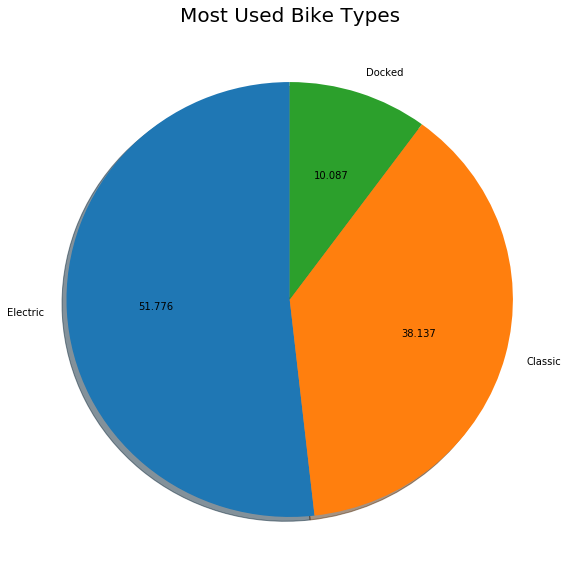

In [35]:
plt.figure(figsize=(10,10))
plt.pie(merged_bikes['bike_type'].value_counts(),startangle=90,autopct='%.3f',labels=['Electric', 'Classic', 'Docked'],shadow=True)
plt.title('Most Used Bike Types', fontsize=20)
plt.show();

## Pointplot - Bike Types vs Weekday

> Continuing from the above pie chart  - clarifying our initial assumptions that Electric Bikes would have on average more trips because it has more bikes then all the other bikes combined - but we see in the below grpah that we could not be more further from the truth because docked bikes on avaerage has higher duration times then electric bikes and electric bikes in terms of average duration records the lowest number of trips(duration) then the rest of the bikes

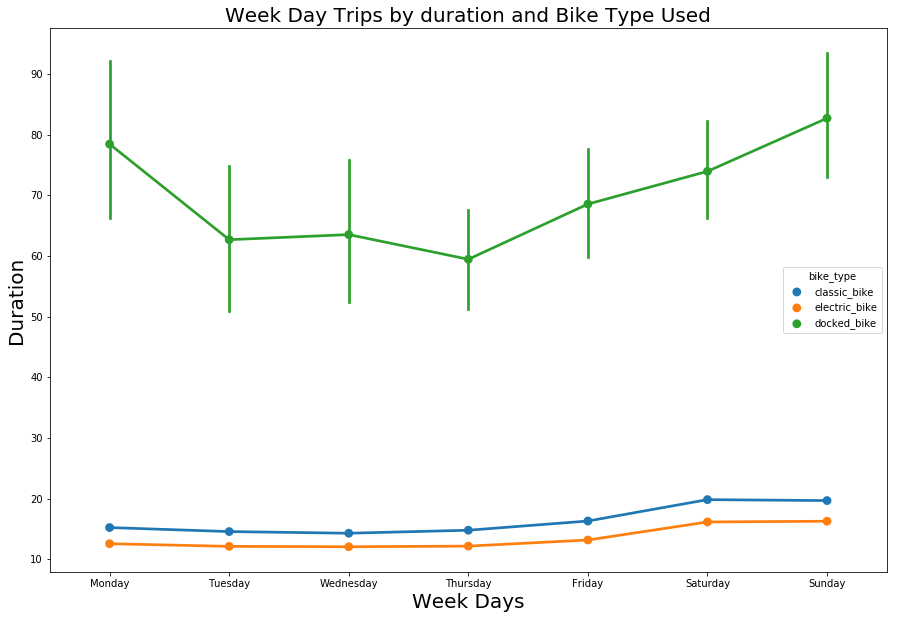

In [34]:
#https://www.tutorialspoint.com/how-to-have-a-function-return-a-figure-in-python-using-matplotlib

#function to reuse pointplot

def pointplot(x,y,hue):
    df=merged_bikes
    fig=plt.figure(figsize = (15,10))
    plot=sns.pointplot(y=y,x=x,hue=hue,data=merged_bikes, order=weekday_labels)
    title=plt.title ("Week Day Trips by Duration and Bike Type Used", fontsize=20) #.capitalize makes the first letter a capital letter
    ylabel=plt.ylabel("Duration", fontsize=20)
    xlabel=plt.xlabel("Week Days", fontsize=20)
    return df,fig,plot,title,ylabel,xlabel

pointplot("week_day","duration", "bike_type")
plt.show();

## Countplot - Months with highest trip count

> It seems that during the winter months Dec-Feb less people make use of the service, which is expected since people don't want to get trapped in snow on a bike or get caught in the rain as oppossed to the summer months June-Aug. October seems to be the clear winner, one of the reasons seems to be tourists and events taking place that month - In the fall, temperatures begin to cool down around the country. This is a welcome season in northern regions, where leaves change to beautiful shades of red, yellow and orange.
* https://www.holidify.com/pages/san-francisco-in-october-5283.html

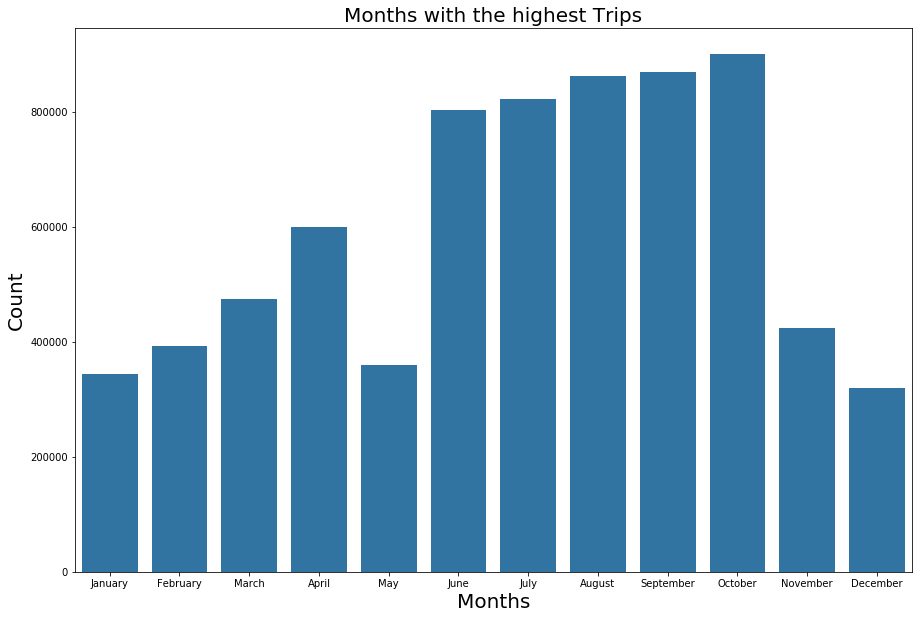

In [33]:
fig, ax = plt.subplots(figsize = [15,10])
sns.countplot(x=merged_bikes['month'],
                   order=month_labels, color=default_color).set_title('Months with the highest Trips', fontsize=20)
plt.xlabel("Months",fontsize=20)
plt.ylabel("Count", fontsize=20)
plt.show();

### Generate Slideshow
Once you're ready to generate your slideshow, use the `jupyter nbconvert` command to generate the HTML slide show.  

In [ ]:
# Use this command if you are running this file in local
!jupyter nbconvert Part_II_dataset_slide_deck.ipynb --to slides --post serve --no-input --no-prompt

[NbConvertApp] Converting notebook Part_II_dataset_slide_deck.ipynb to slides
[NbConvertApp] Writing 394032 bytes to Part_II_dataset_slide_deck.slides.html
[NbConvertApp] Redirecting reveal.js requests to https://cdnjs.cloudflare.com/ajax/libs/reveal.js/3.5.0
Serving your slides at http://127.0.0.1:8000/Part_II_dataset_slide_deck.slides.html
Use Control-C to stop this server
/usr/bin/xdg-open: 778: /usr/bin/xdg-open: x-www-browser: not found
/usr/bin/xdg-open: 778: /usr/bin/xdg-open: firefox: not found
/usr/bin/xdg-open: 778: /usr/bin/xdg-open: iceweasel: not found
/usr/bin/xdg-open: 778: /usr/bin/xdg-open: seamonkey: not found
/usr/bin/xdg-open: 778: /usr/bin/xdg-open: mozilla: not found
/usr/bin/xdg-open: 778: /usr/bin/xdg-open: epiphany: not found
/usr/bin/xdg-open: 778: /usr/bin/xdg-open: konqueror: not found
/usr/bin/xdg-open: 778: /usr/bin/xdg-open: chromium-browser: not found
/usr/bin/xdg-open: 778: /usr/bin/xdg-open: google-chrome: not found
/usr/bin/xdg-open: 778: /usr/bin/xdg

> In the classroom workspace, the generated HTML slideshow will be placed in the home folder. 

> In local machines, the command above should open a tab in your web browser where you can scroll through your presentation. Sub-slides can be accessed by pressing 'down' when viewing its parent slide. Make sure you remove all of the quote-formatted guide notes like this one before you finish your presentation! At last, you can stop the Kernel. 

### Submission
If you are using classroom workspace, you can choose from the following two ways of submission:

1. **Submit from the workspace**. Make sure you have removed the example project from the /home/workspace directory. You must submit the following files:
   - Part_I_notebook.ipynb
   - Part_I_notebook.html or pdf
   - Part_II_notebook.ipynb
   - Part_I_slides.html
   - README.md
   - dataset (optional)


2. **Submit a zip file on the last page of this project lesson**. In this case, open the Jupyter terminal and run the command below to generate a ZIP file. 
```bash
zip -r my_project.zip .
```
The command abobve will ZIP every file present in your /home/workspace directory. Next, you can download the zip to your local, and follow the instructions on the last page of this project lesson.
